# Текстовые данные


## Генератор случайного текста

In [1]:
pip install python-lorem

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import lorem
nonsense = lorem.get_paragraph()
nonsense

'Adipiscing ex occaecat sit aute do ut cillum, nulla anim proident reprehenderit consequat. Veniam est consequat aliquip. Elit irure aliqua reprehenderit ut cillum non irure. Cupidatat tempor id laborum eu non dolore, tempor velit qui dolor sit, incididunt occaecat amet excepteur ad qui duis est. Adipiscing cillum aute do velit. Adipiscing cupidatat ea sint. Reprehenderit quis amet esse, exercitation tempor fugiat cupidatat voluptate excepteur. In consequat ullamco aute, sunt nostrud consequat consectetur officia incididunt.'

##NLTK: Gutenberg corpus
Natural Language ToolKit.

Выборка из библиотеки Гутенберга.

https://www.nltk.org/book/ch02.html

In [3]:
import nltk
nltk.download(['gutenberg', 'punkt'])
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [4]:
print('\n'.join(gutenberg.fileids()))

austen-emma.txt
austen-persuasion.txt
austen-sense.txt
bible-kjv.txt
blake-poems.txt
bryant-stories.txt
burgess-busterbrown.txt
carroll-alice.txt
chesterton-ball.txt
chesterton-brown.txt
chesterton-thursday.txt
edgeworth-parents.txt
melville-moby_dick.txt
milton-paradise.txt
shakespeare-caesar.txt
shakespeare-hamlet.txt
shakespeare-macbeth.txt
whitman-leaves.txt


In [5]:
print(gutenberg.raw('carroll-alice.txt')[:500])

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


## Деление текста на предложения


### Инструменты языкового анализа


In [6]:
from nltk.tokenize.punkt import PunktSentenceTokenizer
sentence_tokenizer = PunktSentenceTokenizer()
sentence_tokenizer.tokenize('Hello! World?')

['Hello!', 'World?']

In [7]:
sentence_tokenizer.tokenize(nonsense)

['Adipiscing ex occaecat sit aute do ut cillum, nulla anim proident reprehenderit consequat.',
 'Veniam est consequat aliquip.',
 'Elit irure aliqua reprehenderit ut cillum non irure.',
 'Cupidatat tempor id laborum eu non dolore, tempor velit qui dolor sit, incididunt occaecat amet excepteur ad qui duis est.',
 'Adipiscing cillum aute do velit.',
 'Adipiscing cupidatat ea sint.',
 'Reprehenderit quis amet esse, exercitation tempor fugiat cupidatat voluptate excepteur.',
 'In consequat ullamco aute, sunt nostrud consequat consectetur officia incididunt.']

### Информация в первоисточнике

In [8]:
[lorem.get_sentence() for _ in range(5)]

['Ut amet consequat aliqua, magna qui pariatur dolore laboris dolor.',
 'Eu excepteur lorem cillum magna laboris officia.',
 'Tempor proident non amet est lorem, consequat quis sed veniam culpa officia, enim mollit sint magna eiusmod laboris minim.',
 'In consequat cupidatat reprehenderit exercitation.',
 'Occaecat exercitation ex id culpa lorem ad.']

In [9]:
gutenberg.sents('carroll-alice.txt')[:2]

[['[',
  'Alice',
  "'",
  's',
  'Adventures',
  'in',
  'Wonderland',
  'by',
  'Lewis',
  'Carroll',
  '1865',
  ']'],
 ['CHAPTER', 'I', '.']]

## Деление текста на слова


In [10]:
from nltk import word_tokenize, wordpunct_tokenize
import re
"hello world".split(), re.split("\s", "hello world"), word_tokenize("hello world"), wordpunct_tokenize("hello world")

(['hello', 'world'],
 ['hello', 'world'],
 ['hello', 'world'],
 ['hello', 'world'])

In [11]:
for f in str.split, re.compile("\s").split, word_tokenize, wordpunct_tokenize:
  print(f(nonsense))

['Adipiscing', 'ex', 'occaecat', 'sit', 'aute', 'do', 'ut', 'cillum,', 'nulla', 'anim', 'proident', 'reprehenderit', 'consequat.', 'Veniam', 'est', 'consequat', 'aliquip.', 'Elit', 'irure', 'aliqua', 'reprehenderit', 'ut', 'cillum', 'non', 'irure.', 'Cupidatat', 'tempor', 'id', 'laborum', 'eu', 'non', 'dolore,', 'tempor', 'velit', 'qui', 'dolor', 'sit,', 'incididunt', 'occaecat', 'amet', 'excepteur', 'ad', 'qui', 'duis', 'est.', 'Adipiscing', 'cillum', 'aute', 'do', 'velit.', 'Adipiscing', 'cupidatat', 'ea', 'sint.', 'Reprehenderit', 'quis', 'amet', 'esse,', 'exercitation', 'tempor', 'fugiat', 'cupidatat', 'voluptate', 'excepteur.', 'In', 'consequat', 'ullamco', 'aute,', 'sunt', 'nostrud', 'consequat', 'consectetur', 'officia', 'incididunt.']
['Adipiscing', 'ex', 'occaecat', 'sit', 'aute', 'do', 'ut', 'cillum,', 'nulla', 'anim', 'proident', 'reprehenderit', 'consequat.', 'Veniam', 'est', 'consequat', 'aliquip.', 'Elit', 'irure', 'aliqua', 'reprehenderit', 'ut', 'cillum', 'non', 'irure.

In [12]:
import re
word_re = re.compile('\w+|[^\w\s]+')

print('source', len(gutenberg.words('carroll-alice.txt')))
print('split', len(gutenberg.raw('carroll-alice.txt').split()))
print('word_tokenize', len(word_tokenize(gutenberg.raw('carroll-alice.txt'))))
print('wordpunkt_tokenize', len(wordpunct_tokenize(gutenberg.raw('carroll-alice.txt'))))
print('regular expression', len(word_re.findall(gutenberg.raw('carroll-alice.txt'))))

source 34110
split 26443
word_tokenize 33494
wordpunkt_tokenize 34110
regular expression 34110


In [13]:
print('source', gutenberg.words('carroll-alice.txt')[:50])
print()
print('split', gutenberg.raw('carroll-alice.txt').split()[:50])
print('word_tokenize', word_tokenize(gutenberg.raw('carroll-alice.txt'))[:50])
print('wordpunkt_tokenize', wordpunct_tokenize(gutenberg.raw('carroll-alice.txt'))[:50])
print('regular expression', word_re.findall(gutenberg.raw('carroll-alice.txt'))[:50])

source ['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into']

split ["[Alice's", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865]', 'CHAPTER', 'I.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank,', 'and', 'of', 'having', 'nothing', 'to', 'do:', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into', 'the', 'book', 'her', 'sister', 'was', 'reading,', 'but', 'it', 'had']
word_tokenize ['[', 'Alice', "'s", 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit-Hole', 'Alice', 'was', 

# Задача: подсчёт популярности слов
Разобъем входные данные на подстроки для обработки по частям.

In [14]:
alice_lines = gutenberg.raw('carroll-alice.txt').splitlines()
alice_lines[123]

'that Alice had begun to think that very few things indeed were really'

## Просто цикл ("классический" подход)

In [15]:
counts = {}

for line in alice_lines:
    words = wordpunct_tokenize(line)

    for word in words:
        word = word.lower()
        counts[word] = counts.get(word, 0) + 1

print(counts)
print(sum(counts.values()))
list(
    reversed(
        sorted((n, word) for word, n in counts.items())
    )
)[:10]

{'[': 3, 'alice': 398, "'": 1731, 's': 201, 'adventures': 7, 'in': 369, 'wonderland': 3, 'by': 59, 'lewis': 1, 'carroll': 1, '1865': 1, ']': 1, 'chapter': 12, 'i': 543, '.': 764, 'down': 102, 'the': 1642, 'rabbit': 51, '-': 141, 'hole': 5, 'was': 357, 'beginning': 14, 'to': 729, 'get': 46, 'very': 144, 'tired': 7, 'of': 514, 'sitting': 10, 'her': 248, 'sister': 9, 'on': 193, 'bank': 3, ',': 1993, 'and': 872, 'having': 10, 'nothing': 34, 'do': 81, ':': 216, 'once': 34, 'or': 77, 'twice': 5, 'she': 553, 'had': 178, 'peeped': 3, 'into': 67, 'book': 11, 'reading': 3, 'but': 170, 'it': 595, 'no': 90, 'pictures': 4, 'conversations': 1, 'what': 141, 'is': 108, 'use': 18, 'a': 632, ",'": 397, 'thought': 74, 'without': 26, 'conversation': 10, "?'": 154, 'so': 151, 'considering': 3, 'own': 10, 'mind': 11, '(': 50, 'as': 263, 'well': 63, 'could': 77, 'for': 153, 'hot': 7, 'day': 29, 'made': 30, 'feel': 8, 'sleepy': 5, 'stupid': 6, '),': 8, 'whether': 11, 'pleasure': 2, 'making': 8, 'daisy': 1, 'c

[(1993, ','),
 (1731, "'"),
 (1642, 'the'),
 (872, 'and'),
 (764, '.'),
 (729, 'to'),
 (632, 'a'),
 (595, 'it'),
 (553, 'she'),
 (543, 'i')]

## Идиоматический Питон


In [16]:
print(alice_lines[0])
words = [w for line in alice_lines for w in wordpunct_tokenize(line)]
print(words[:50])
lower_words = [w.lower() for w in words]
print(lower_words[:50])
print(len(lower_words))

[Alice's Adventures in Wonderland by Lewis Carroll 1865]
['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']', 'CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'Hole', 'Alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into']
['[', 'alice', "'", 's', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', '1865', ']', 'chapter', 'i', '.', 'down', 'the', 'rabbit', '-', 'hole', 'alice', 'was', 'beginning', 'to', 'get', 'very', 'tired', 'of', 'sitting', 'by', 'her', 'sister', 'on', 'the', 'bank', ',', 'and', 'of', 'having', 'nothing', 'to', 'do', ':', 'once', 'or', 'twice', 'she', 'had', 'peeped', 'into']
34110


In [17]:
from collections import Counter

counts = Counter(lower_words)
print(sum(counts.values()))
counts.most_common(10)


34110


[(',', 1993),
 ("'", 1731),
 ('the', 1642),
 ('and', 872),
 ('.', 764),
 ('to', 729),
 ('a', 632),
 ('it', 595),
 ('she', 553),
 ('i', 543)]

In [18]:
Counter(w.lower() for line in alice_lines for w in wordpunct_tokenize(line)).most_common(10)

[(',', 1993),
 ("'", 1731),
 ('the', 1642),
 ('and', 872),
 ('.', 764),
 ('to', 729),
 ('a', 632),
 ('it', 595),
 ('she', 553),
 ('i', 543)]

In [19]:
import operator
from functools import reduce

print(alice_lines[0])
words = [[w for w in wordpunct_tokenize(line)] for line in alice_lines]
print(words[:4])
lower_words = [[w.lower() for w in line] for line in words]
print(lower_words[:4])
counters = [Counter(line) for line in lower_words]
print(counters)
reduce(operator.add, counters, Counter()).most_common(10)


[Alice's Adventures in Wonderland by Lewis Carroll 1865]
[['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']'], [], ['CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'Hole'], []]
[['[', 'alice', "'", 's', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', '1865', ']'], [], ['chapter', 'i', '.', 'down', 'the', 'rabbit', '-', 'hole'], []]
[Counter({'[': 1, 'alice': 1, "'": 1, 's': 1, 'adventures': 1, 'in': 1, 'wonderland': 1, 'by': 1, 'lewis': 1, 'carroll': 1, '1865': 1, ']': 1}), Counter(), Counter({'chapter': 1, 'i': 1, '.': 1, 'down': 1, 'the': 1, 'rabbit': 1, '-': 1, 'hole': 1}), Counter(), Counter({'alice': 1, 'was': 1, 'beginning': 1, 'to': 1, 'get': 1, 'very': 1, 'tired': 1, 'of': 1, 'sitting': 1, 'by': 1, 'her': 1, 'sister': 1, 'on': 1, 'the': 1}), Counter({'bank': 1, ',': 1, 'and': 1, 'of': 1, 'having': 1, 'nothing': 1, 'to': 1, 'do': 1, ':': 1, 'once': 1, 'or': 1, 'twice': 1, 'she': 1, 'had': 1, 'peeped': 1, 'into': 1, 'th

[(',', 1993),
 ("'", 1731),
 ('the', 1642),
 ('and', 872),
 ('.', 764),
 ('to', 729),
 ('a', 632),
 ('it', 595),
 ('she', 553),
 ('i', 543)]

## Функциональный подход

In [20]:
from itertools import chain

word_lists = map(wordpunct_tokenize, alice_lines)
#print(list(word_lists)[:3])
words = chain(*word_lists)
#print(list(words)[:20])
lower_words = map(str.lower, words)
#print(list(lower_words)[:10])
Counter(lower_words).most_common(10)

[(',', 1993),
 ("'", 1731),
 ('the', 1642),
 ('and', 872),
 ('.', 764),
 ('to', 729),
 ('a', 632),
 ('it', 595),
 ('she', 553),
 ('i', 543)]

In [21]:
word_lists = list(map(wordpunct_tokenize, alice_lines))
print(word_lists[:4])
lower_words = list(map(
    lambda line_words: [w.lower() for w in line_words],
    word_lists
))
print(lower_words[:4])
counters = map(Counter, lower_words)
reduce(operator.add, counters, Counter()).most_common(10)

[['[', 'Alice', "'", 's', 'Adventures', 'in', 'Wonderland', 'by', 'Lewis', 'Carroll', '1865', ']'], [], ['CHAPTER', 'I', '.', 'Down', 'the', 'Rabbit', '-', 'Hole'], []]
[['[', 'alice', "'", 's', 'adventures', 'in', 'wonderland', 'by', 'lewis', 'carroll', '1865', ']'], [], ['chapter', 'i', '.', 'down', 'the', 'rabbit', '-', 'hole'], []]


[(',', 1993),
 ("'", 1731),
 ('the', 1642),
 ('and', 872),
 ('.', 764),
 ('to', 729),
 ('a', 632),
 ('it', 595),
 ('she', 553),
 ('i', 543)]

## Удобные свойства map и reduce:

Если функция чистая, то мап можно вызывать параллельно

In [22]:
from multiprocessing import Pool
print(list(map(str, [1, 2, 3, 4, 5, 6])))
with Pool() as pool:
  print(pool.map(str, [1, 2, 3, 4, 5, 6]))

['1', '2', '3', '4', '5', '6']
['1', '2', '3', '4', '5', '6']


Если reduce действительно работает как reduce, то его можно вызывать от результата других вызовов reduce

In [23]:
from functools import reduce
def add(s, x):
  return s + x
print(reduce(add, range(10)))
print(reduce(add, 
       [
        reduce(add, range(3)), 
        reduce(add, range(3,6)),
        reduce(add, range(6,10))
       ]
))

45
45


In [24]:
def count(s, x):
  return s + 1
print(reduce(count, range(10)))
print(reduce(count, 
       [
        reduce(count, range(3), 0), 
        reduce(count, range(3,6), 0),
        reduce(count, range(6,10), 0)
       ]
      , 0)
)

9
3


## Локальный MapReduce
https://towardsdatascience.com/a-beginners-introduction-into-mapreduce-2c912bb5e6ac

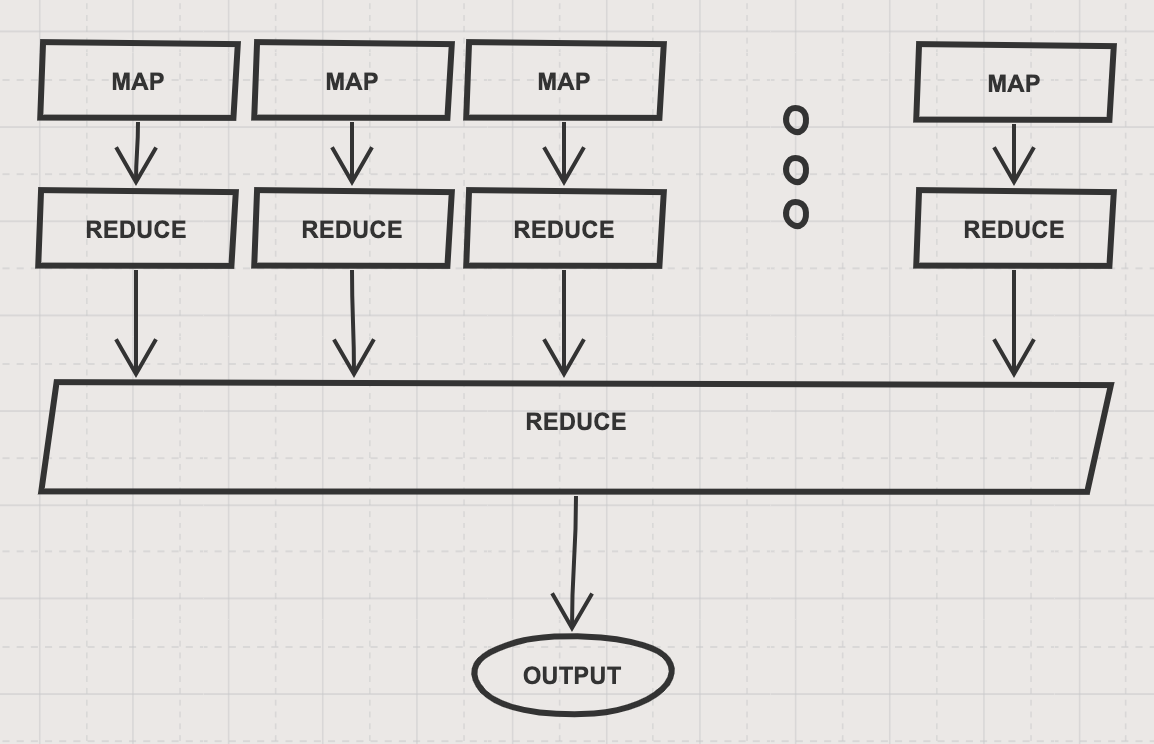

In [25]:
from typing import List, Iterable
def wordcounter(s: str) -> Counter:
  return Counter(map(str.lower, wordpunct_tokenize(s)))

def reduce_counters(counters: Iterable[Counter]) -> Counter:
  return reduce(operator.add, counters, Counter())

wordcounter("Hello world!")

Counter({'hello': 1, 'world': 1, '!': 1})

In [26]:
%time reduce_counters(map(wordcounter, alice_lines)).most_common(10)

CPU times: user 4.12 s, sys: 44.2 ms, total: 4.17 s
Wall time: 5.18 s


[(',', 1993),
 ("'", 1731),
 ('the', 1642),
 ('and', 872),
 ('.', 764),
 ('to', 729),
 ('a', 632),
 ('it', 595),
 ('she', 553),
 ('i', 543)]

In [27]:
from multiprocessing import Pool

with Pool() as pool:
  %time reduce_counters(pool.map(wordcounter, alice_lines)).most_common(10)

CPU times: user 4.25 s, sys: 60 ms, total: 4.31 s
Wall time: 5.83 s


In [28]:
def word_counters(s: str) -> List[Counter]:
  return [Counter([w.lower()]) for w in wordpunct_tokenize(s)]

word_counters("Hello world!")

[Counter({'hello': 1}), Counter({'world': 1}), Counter({'!': 1})]

In [29]:
def wordcount_local(texts: Iterable[str]) -> Counter:
    return reduce_counters(
        map(reduce_counters,
            map(word_counters,
                texts)
        )
    )

In [30]:
%time wordcount_local(alice_lines).most_common(10)

CPU times: user 4.48 s, sys: 36.3 ms, total: 4.52 s
Wall time: 6.49 s


[(',', 1993),
 ("'", 1731),
 ('the', 1642),
 ('and', 872),
 ('.', 764),
 ('to', 729),
 ('a', 632),
 ('it', 595),
 ('she', 553),
 ('i', 543)]

In [31]:
much_nonsense = [lorem.get_paragraph() for _ in range(40)]
%timeit wordcount_local(much_nonsense).most_common(10)

44.2 ms ± 697 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [32]:
def wordcount_local_mp(texts: Iterable[str]) -> Counter:
  with Pool() as pool:
    return reduce_counters(
      pool.map(reduce_counters,
        pool.map(word_counters,
          texts)
      )
  )

In [33]:
%timeit wordcount_local_mp(much_nonsense).most_common(10)

109 ms ± 1.95 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# Простой "распределенный" MapReduce

https://ru.wikipedia.org/wiki/MapReduce

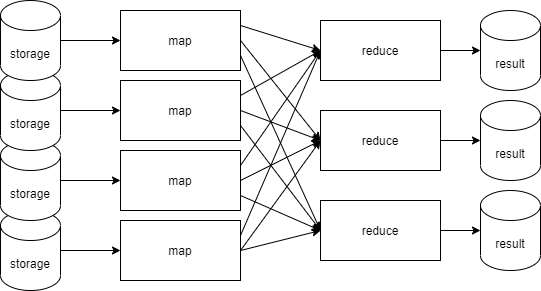

Принцип обработки данных
```
[записи]
-> Map ->
[(k1, v11), (k2, v21), (k1, v12) ...]
-> Shuffle ->
{k1: [v11, v12, ...]), k2: [v21, ...], ...}
-> Reduce ->
{k1: V1, k2: V2, ...}
```

Действие функций mapper и reducer, решающих задачу:

`запись -> mapper -> [(k1, v1), (k2, v2), (k1, v3) ...]`

`[v1, v3, ...] -> reducer -> V`

## Map

In [34]:
from typing import List, Tuple
def count_words_mapper(line: str) -> List[Tuple[str, int]]:
  return [(w, 1) for w in wordpunct_tokenize(line)]

In [35]:
count_words_mapper("hello world")

[('hello', 1), ('world', 1)]

In [36]:
list(map(count_words_mapper,
         ["hello world", "hello me"]
         ))

[[('hello', 1), ('world', 1)], [('hello', 1), ('me', 1)]]

In [37]:
from typing import Callable

def map_layer(mapper: Callable) -> Callable:
  def inner(records: Iterable) -> List[Tuple]:
    return [(k, v) for r in records for k, v in mapper(r)]
  return inner

word_counters = map_layer(count_words_mapper)

In [38]:
word_counters( ["hello world", "hello me"])

[('hello', 1), ('world', 1), ('hello', 1), ('me', 1)]

In [39]:
list(word_counters(alice_lines))[:20]

[('[', 1),
 ('Alice', 1),
 ("'", 1),
 ('s', 1),
 ('Adventures', 1),
 ('in', 1),
 ('Wonderland', 1),
 ('by', 1),
 ('Lewis', 1),
 ('Carroll', 1),
 ('1865', 1),
 (']', 1),
 ('CHAPTER', 1),
 ('I', 1),
 ('.', 1),
 ('Down', 1),
 ('the', 1),
 ('Rabbit', 1),
 ('-', 1),
 ('Hole', 1)]

## Merge by key


In [40]:
from typing import Dict, Any
from collections import defaultdict

def merge_layer(pairs: List[Tuple]) -> Dict[Any, List]:
  result = defaultdict(list)
  for k, v in pairs:
    result[k].append(v)
  return dict(result)

merge_layer([('a', 1), ('b', 2), ('c', 3), ('a', 4), ('a', 5), ('x', 6), ('y', 7)])

{'a': [1, 4, 5], 'b': [2], 'c': [3], 'x': [6], 'y': [7]}

In [41]:
from itertools import islice
merge_layer(word_counters(islice(alice_lines, 20)))

{'[': [1],
 'Alice': [1, 1, 1, 1],
 "'": [1, 1, 1, 1],
 's': [1],
 'Adventures': [1],
 'in': [1, 1, 1, 1],
 'Wonderland': [1],
 'by': [1, 1, 1],
 'Lewis': [1],
 'Carroll': [1],
 '1865': [1],
 ']': [1],
 'CHAPTER': [1],
 'I': [1, 1],
 '.': [1, 1],
 'Down': [1],
 'the': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'Rabbit': [1, 1, 1],
 '-': [1, 1],
 'Hole': [1],
 'was': [1, 1, 1, 1],
 'beginning': [1],
 'to': [1, 1, 1, 1, 1, 1],
 'get': [1],
 'very': [1, 1],
 'tired': [1],
 'of': [1, 1, 1, 1, 1, 1],
 'sitting': [1],
 'her': [1, 1, 1, 1, 1, 1],
 'sister': [1, 1],
 'on': [1],
 'bank': [1],
 ',': [1, 1, 1, 1, 1, 1, 1, 1],
 'and': [1, 1, 1, 1],
 'having': [1],
 'nothing': [1, 1],
 'do': [1],
 ':': [1],
 'once': [1],
 'or': [1, 1, 1],
 'twice': [1],
 'she': [1, 1, 1, 1, 1],
 'had': [1, 1],
 'peeped': [1],
 'into': [1],
 'book': [1, 1],
 'reading': [1],
 'but': [1, 1],
 'it': [1, 1, 1, 1, 1],
 'no': [1],
 'pictures': [1, 1],
 'conversations': [1],
 'what': [1],
 'is': [1],
 'use': [1],
 'a': [1, 1, 1],

## Reduce

`[v1, v3, ...] -> reducer -> V`

`{k1: [v11, v12, ...]), k2: [v21, ...], ...} -> Reduce -> {k1: V1, k2: V2, ...}`

In [42]:
from typing import Generator
def reduce_layer(reducer: Callable) -> Callable:
  def inner(merged: Dict[Any, List]) -> Dict:
    return {k: reducer(v) for k, v in merged.items()}
  return inner

counter_adder = reduce_layer(sum)

alice_wordcounts = counter_adder(merge_layer(word_counters(alice_lines)))

print(alice_wordcounts)

{'[': 3, 'Alice': 396, "'": 1731, 's': 195, 'Adventures': 3, 'in': 357, 'Wonderland': 3, 'by': 55, 'Lewis': 1, 'Carroll': 1, '1865': 1, ']': 1, 'CHAPTER': 12, 'I': 543, '.': 764, 'Down': 3, 'the': 1527, 'Rabbit': 45, '-': 141, 'Hole': 1, 'was': 352, 'beginning': 14, 'to': 725, 'get': 44, 'very': 126, 'tired': 7, 'of': 500, 'sitting': 10, 'her': 243, 'sister': 9, 'on': 189, 'bank': 3, ',': 1993, 'and': 802, 'having': 10, 'nothing': 30, 'do': 68, ':': 216, 'once': 31, 'or': 76, 'twice': 5, 'she': 509, 'had': 177, 'peeped': 3, 'into': 67, 'book': 11, 'reading': 3, 'but': 133, 'it': 527, 'no': 69, 'pictures': 4, 'conversations': 1, 'what': 93, 'is': 97, 'use': 18, 'a': 615, ",'": 397, 'thought': 74, 'without': 26, 'conversation': 10, "?'": 154, 'So': 27, 'considering': 3, 'own': 10, 'mind': 9, '(': 50, 'as': 246, 'well': 40, 'could': 73, 'for': 140, 'hot': 7, 'day': 29, 'made': 30, 'feel': 8, 'sleepy': 5, 'stupid': 5, '),': 8, 'whether': 11, 'pleasure': 2, 'making': 8, 'daisy': 1, 'chain':

In [43]:
sorted(alice_wordcounts.items(), key=lambda pair: -pair[1])[:20]

[(',', 1993),
 ("'", 1731),
 ('the', 1527),
 ('and', 802),
 ('.', 764),
 ('to', 725),
 ('a', 615),
 ('I', 543),
 ('it', 527),
 ('she', 509),
 ('of', 500),
 ('said', 456),
 (",'", 397),
 ('Alice', 396),
 ('in', 357),
 ('was', 352),
 ('you', 345),
 ("!'", 278),
 ('that', 275),
 ('as', 246)]

## Собираем

In [44]:
import pandas as pd

def simple_job(mapper: Callable, reducer:Callable) -> Callable:
  m = map_layer(mapper)
  r = reduce_layer(reducer)
  def inner(records: List) -> Dict:
    return dict(r(merge_layer(m(records))))
  return inner

wordcounter = simple_job(
    lambda f: ((token, 1) for token in word_tokenize(f)),
    sum)
gutenberg_raw = [gutenberg.raw(f) for f in gutenberg.fileids()]

%time result = wordcounter(gutenberg_raw)

pass
sorted(result.items(), key=lambda pair: -pair[1])[:20]


CPU times: user 38.6 s, sys: 1.92 s, total: 40.6 s
Wall time: 40.6 s


[(',', 192339),
 ('the', 125717),
 ('and', 78726),
 ('.', 76290),
 ('of', 70031),
 ('to', 46102),
 ('a', 32390),
 ('in', 31868),
 ('I', 30139),
 (';', 27942),
 ('that', 27262),
 ('he', 22180),
 ('his', 20580),
 ('it', 19660),
 ('was', 18618),
 ('not', 17641),
 ("''", 17045),
 ('for', 16840),
 ('with', 16823),
 (':', 16523)]

In [45]:
import pandas as pd
df = pd.DataFrame(result.items(), columns=["word", "occurences"])
df

,word,occurences
0,[,131
1,Emma,856
2,by,7981
3,Jane,303
4,Austen,3
...,...,...
61833,Billions,1
61834,Urging,1
61835,heart-thud,1
61836,blither,1


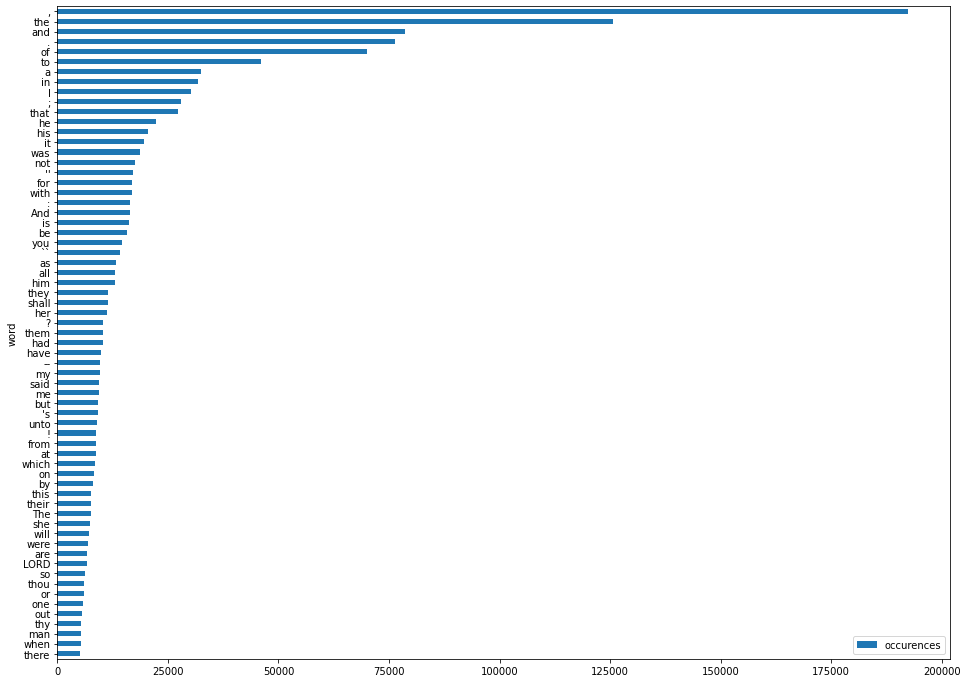

In [46]:
df[df.occurences>5000].sort_values('occurences').plot(x='word', y='occurences', kind='barh', figsize=(16, 12))

In [47]:
%timeit wordcounter(much_nonsense)

34.8 ms ± 812 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [48]:
def mapper(numbers: List[int]) -> Tuple[str, int]:
  return [('total', sum(numbers)), ('count', len(numbers))]

# Иногда логика редюсера должна зависеть от ключа
# На этот раз нам повезло
def reducer(values: Iterable[int]) -> int:
  return sum(values)

average =  simple_job(
    mapper,
    reducer
)

result = average([[1, 2, 3, 1, 2, 3], [10, -10]])
print(result)
result['total']/result['count']
# Не всегда можно получить ответ за один mapreduce!

{'total': 12, 'count': 8}


1.5

In [49]:
def mapper2(numbers: List[int]) -> Tuple[str, Tuple[int, int]]:
  return [('average', (sum(numbers), len(numbers)))]
# Почему бы не вернуть в ответе кортеж-пару в качестве значения?

def reducer2(values: Iterable[Tuple[int, int]]):
  total = sum(pair[0] for pair in values)
  count = sum(pair[1] for pair in values)
  return total/count

average2 = simple_job(
    mapper2,
    reducer2
)

average2([[1, 2, 3, 1, 2, 3], [10, -10]])

{'average': 1.5}

## Задание

1. Посчитать суммарное количество слов в `gutenberg_raw` (через `simple_job`)

2. Посчитать суммарное количество слов и суммарное количество предложений одним запуском `simple_job(...)(gutenberg_raw)`

3. Найти (с помощью `simple_job`) самое длинное предложение в gutenberg_raw

4. Посчитать с помощью `simple_job` гистограмму распределения длины предложений (в словах) по датасету `sent_tokenize(gutenberg.raw('carroll-alice.txt'))`. То есть какие предложения в тексте встречаются наиболее часто? 

  Потом эти данные можно собрать в pandas DataFrame и визуализировать. Как правильно визуализировать заранее просчитанную гистограмму, см. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

  Подсказка: 
  - Вариант 1. Ключом может быть номер ячейки гистограммы. Тогда размер ячеек нужно задать заранее.
  - Вариант 2. Можно посчитать из каждого предложения целую гистограмму. Параметры гистограммы тоже придётся задавать заранее.
  - Вариант 3. Сделать ключом длину предложения. Проще всего с точки зрения map и reduce, но не до конца решает задачу (потребует дополнительной обработки результата).


1

In [50]:
sum_word = simple_job(lambda text: (("words count", 1) for token in word_tokenize(text)), sum)

%time result = sum_word(gutenberg_raw)
result

CPU times: user 37.9 s, sys: 2.07 s, total: 40 s
Wall time: 41 s


{'words count': 2538828}

2

In [51]:
sum_sent_word = simple_job(lambda text: (("sentences", len(sentence_tokenizer.tokenize(text))),("words", len(word_tokenize(text)))), sum)

%time result = sum_sent_word(gutenberg_raw)
result

CPU times: user 1min 3s, sys: 6.94 s, total: 1min 9s
Wall time: 1min 10s


{'sentences': 97998, 'words': 2538828}

3

In [52]:
longest_sent = simple_job(lambda text: (("longest", len(word_tokenize(sentence))) for sentence in sentence_tokenizer.tokenize(text)), max)

%time result = longest_sent(gutenberg_raw)
result

CPU times: user 41 s, sys: 3.61 s, total: 44.6 s
Wall time: 44.7 s


{'longest': 1242}

4

In [53]:
from matplotlib import pyplot as plt
alice_text = [gutenberg.raw('carroll-alice.txt'),]

CPU times: user 281 ms, sys: 31 µs, total: 281 ms
Wall time: 285 ms


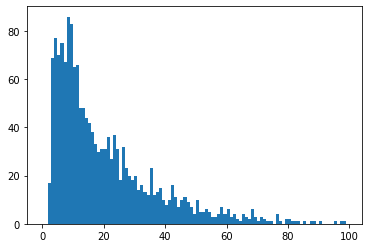

In [54]:
sent_lengths = simple_job(lambda text: ((len(word_tokenize(sentence)), 1) for sentence in sentence_tokenizer.tokenize(text)), sum)

%time result = sent_lengths(alice_text)
df = pd.DataFrame(result.items(), columns=["sentence", "occurences"])
plt.hist(df['sentence'], weights=df['occurences'], bins=range(100))
plt.show()

# Hadoop MapReduce

https://hadoop.apache.org/docs/current/hadoop-mapreduce-client/hadoop-mapreduce-client-core/MapReduceTutorial.html#Job_Configuration

- InputFormat
- Mapper
- combiner (если есть) - локальный пре-Reducer
- Partitioner - управляет shuffle
- Reducer
- OutputFormat

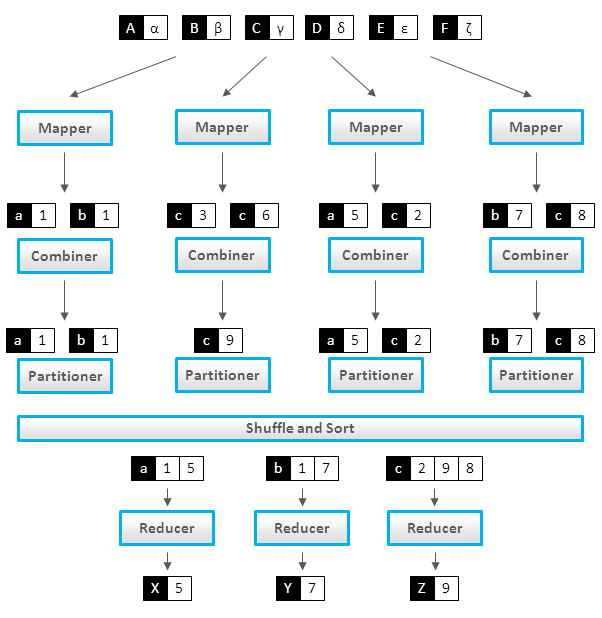

https://highlyscalable.wordpress.com/2012/02/01/mapreduce-patterns/

## Input, output

```
'uri' -> file(s) -> InputSplit
InputFormat.createRecordReader(InputSplit) -> RecordReader

RecordReader.nextKeyValue()
RecordReader.getCurrentKey()
RecordReader.getCurrentValue()
OutputFormat.getRecordWriter(jobconf) -> OutputWriter
```
Главное:
- работа всегда идёт с парами ключ-значение
- и данные и вычисления распределены по кластеру

In [55]:
from nltk.corpus import gutenberg
gutenberg_split = [[(f, gutenberg.raw(f))] for f in gutenberg.fileids()]

[[(k, len(v)) for k,v in node_records] for node_records in gutenberg_split]

[[('austen-emma.txt', 887071)],
 [('austen-persuasion.txt', 466292)],
 [('austen-sense.txt', 673022)],
 [('bible-kjv.txt', 4332554)],
 [('blake-poems.txt', 38153)],
 [('bryant-stories.txt', 249439)],
 [('burgess-busterbrown.txt', 84663)],
 [('carroll-alice.txt', 144395)],
 [('chesterton-ball.txt', 457450)],
 [('chesterton-brown.txt', 406629)],
 [('chesterton-thursday.txt', 320525)],
 [('edgeworth-parents.txt', 935158)],
 [('melville-moby_dick.txt', 1242990)],
 [('milton-paradise.txt', 468220)],
 [('shakespeare-caesar.txt', 112310)],
 [('shakespeare-hamlet.txt', 162881)],
 [('shakespeare-macbeth.txt', 100351)],
 [('whitman-leaves.txt', 711215)]]

In [56]:
gutenberg_lines = [list(enumerate(gutenberg.raw(f).splitlines())) for f in gutenberg.fileids()]

gutenberg_lines[7][:10]


[(0, "[Alice's Adventures in Wonderland by Lewis Carroll 1865]"),
 (1, ''),
 (2, 'CHAPTER I. Down the Rabbit-Hole'),
 (3, ''),
 (4, 'Alice was beginning to get very tired of sitting by her sister on the'),
 (5,
  'bank, and of having nothing to do: once or twice she had peeped into the'),
 (6,
  'book her sister was reading, but it had no pictures or conversations in'),
 (7,
  "it, 'and what is the use of a book,' thought Alice 'without pictures or"),
 (8, "conversation?'"),
 (9, '')]

In [57]:
def lorem_texts(nodes:int=4, records:int=4, size:int=3) -> List[List[Tuple[Tuple[int, int], str]]]:
  return [[(i*records+j, lorem.get_paragraph(count=size)) for j in range(records)] for i in range(nodes)]

lorem_texts()

[[(0,
   'Nulla anim tempor tempor officia do officia. Nulla nostrud deserunt excepteur aliquip ut. Culpa id ipsum cupidatat, esse voluptate ut anim eu sint. Dolore sed adipiscing voluptate. Amet incididunt cillum ex incididunt sed eiusmod eu. Et aliqua culpa quis enim cupidatat incididunt. Minim anim est ipsum laborum, exercitation mollit nulla sed proident enim.\nEst adipiscing ullamco anim aliqua. Duis ut cillum non, in aliqua nisi fugiat lorem duis. Dolor lorem lorem cupidatat non. Fugiat do reprehenderit tempor eu consectetur dolore non. Veniam et lorem quis eu quis. Proident pariatur consectetur consequat est consequat nisi sint. Sit deserunt eiusmod in sunt officia ut ipsum. Ea enim ullamco anim nisi.\nSed consequat ullamco tempor commodo. Proident sunt quis id proident in esse, elit quis nostrud excepteur sit sit elit dolore. Tempor qui laboris nostrud veniam anim. Excepteur cillum deserunt sit esse anim cillum, labore do velit do. Elit magna excepteur sit. Consectetur magna la

## Mapper
`(k,v) -> [(k1, v1), (k2, v2), ...]`

In [58]:
from typing import TypeVar

# ignoring k
def word_counts(k:Any, text:str) -> List[Tuple[str, int]]:
  return [(word, 1) for word in word_tokenize(text)]

T = TypeVar('T')

def len_mapper(k: T, text) -> List[Tuple[T, int]]:
  return [(k, len(text))]

[[len_mapper(k, v) for k, v in local_records] for local_records in gutenberg_split]


[[[('austen-emma.txt', 887071)]],
 [[('austen-persuasion.txt', 466292)]],
 [[('austen-sense.txt', 673022)]],
 [[('bible-kjv.txt', 4332554)]],
 [[('blake-poems.txt', 38153)]],
 [[('bryant-stories.txt', 249439)]],
 [[('burgess-busterbrown.txt', 84663)]],
 [[('carroll-alice.txt', 144395)]],
 [[('chesterton-ball.txt', 457450)]],
 [[('chesterton-brown.txt', 406629)]],
 [[('chesterton-thursday.txt', 320525)]],
 [[('edgeworth-parents.txt', 935158)]],
 [[('melville-moby_dick.txt', 1242990)]],
 [[('milton-paradise.txt', 468220)]],
 [[('shakespeare-caesar.txt', 112310)]],
 [[('shakespeare-hamlet.txt', 162881)]],
 [[('shakespeare-macbeth.txt', 100351)]],
 [[('whitman-leaves.txt', 711215)]]]

In [59]:
records = [('a', 1), ('b', 2), ('c', 3)]
print(list(zip(*records)))

[('a', 'b', 'c'), (1, 2, 3)]


In [60]:
list(map(lambda k, v: (k, v), ('a', 'b', 'c'), (1, 2, 3)))

[('a', 1), ('b', 2), ('c', 3)]

In [61]:
def map_local(mapper: Callable) -> Callable:
  def inner(records: Iterable[Tuple]) -> List:
    return [pair for k, v in records for pair in mapper(k, v)]
  return inner

def double(k, v) -> List[Tuple]:
  return [(k, v)] * 2

print(f"double('a', 1)=", double('a', 1))

print(records, " -> map_local(double) -> ", map_local(double)(records))


double('a', 1)= [('a', 1), ('a', 1)]
[('a', 1), ('b', 2), ('c', 3)]  -> map_local(double) ->  [('a', 1), ('a', 1), ('b', 2), ('b', 2), ('c', 3), ('c', 3)]


## Merge by key


In [62]:
K = TypeVar('K')
V = TypeVar('V')

def merge(pairs: Tuple[K, V]) -> List[Tuple[K, List[V]]]:
  result = defaultdict(list)
  for k, v in pairs:
    result[k] = result[k] + [v]
  return list(result.items())

records = [('a', 1), ('b', 2), ('c', 3), ('a', 4), ('a', 5), ('x', 6), ('y', 7)]

print(f'merge({records}) = ', merge(records))

merge([('a', 1), ('b', 2), ('c', 3), ('a', 4), ('a', 5), ('x', 6), ('y', 7)]) =  [('a', [1, 4, 5]), ('b', [2]), ('c', [3]), ('x', [6]), ('y', [7])]


In [63]:
def merge_nodes(pairs_by_node: List[List[Tuple[K, V]]]) -> List[List[Tuple[K, List[V]]]]:
  return list(map(merge, pairs_by_node))

merge_nodes([[('a', 1), ('b', 2), ('c', 3)],
         [('a', 4), ('a', 5)],
         [('x', 6), ('y', 7)]])

[[('a', [1]), ('b', [2]), ('c', [3])],
 [('a', [4, 5])],
 [('x', [6]), ('y', [7])]]

## Reducer, Combiner
`(k, [v1, v2, v3]) -> [(k1, w1), (k2, w2), ...]`

In [64]:
def summer(k: K, values: List[V]) -> List[Tuple[K, Any]]:
  return [(k, sum(values))]

summer('x', range(10))

[('x', 45)]

In [65]:
local_data = [('a', [1, 2, 3]), ('b', [2])]

print(f"summer('a', [1,2,3])=", summer('a', [1,2,3]))

print(local_data, " -> map_local(summer) -> ", map_local(summer)(local_data))


summer('a', [1,2,3])= [('a', 6)]
[('a', [1, 2, 3]), ('b', [2])]  -> map_local(summer) ->  [('a', 6), ('b', 2)]


## Partitioner
На какой узел направлять данные при shuffle?

`(k, v, Np) -> p`

In [66]:
print(hash('a'))
print(hash('b'))
print(hash(1))

6557073052752365489
497294159985122902
1


In [67]:
-123%10

7

In [68]:
from typing import Hashable
def hash_partitioner(k:Hashable, v:int, N:int) -> int:
  return hash(k)%N
data = "Hello World!"
list(zip(data, [hash_partitioner(c, 'whatever', 7) for c in data]))

[('H', 0),
 ('e', 6),
 ('l', 5),
 ('l', 5),
 ('o', 0),
 (' ', 5),
 ('W', 4),
 ('o', 0),
 ('r', 1),
 ('l', 5),
 ('d', 4),
 ('!', 1)]

## Shuffle

In [69]:
def shuffle(pairs_by_node: List[List[Tuple[K, V]]], Np: int, partitioner:Callable[[K, int, int], int]=hash_partitioner) -> List[List[Tuple[K, List[V]]]]:
  partitions = [defaultdict(list) for _ in range(Np)]
  for pairs in pairs_by_node:
    for k, v in pairs:
      partition = partitions[partitioner(k, v, Np)]
      partition[k].append(v)
  return [[(k, values) for k, values in d.items()] for d in partitions]

shuffle([[('a', 1), ('b', 2), ('c', 3)],
         [('a', 4), ('a', 5)],
         [('x', 6), ('y', 7)]],
        4)

[[('x', [6]), ('y', [7])], [('a', [1, 4, 5])], [('b', [2])], [('c', [3])]]

## Собираем

In [70]:
def describe(name: str, value: Any) -> None:
  if hasattr(value, '__len__'):
    print(f'{name} is a {type(value).__name__} of length {len(value)}')
  else:
    print(f'{name} is a {type(value).__name__}')
  
def debug(name: str, v: List) -> None:
  describe(name, v)
  for i, u in enumerate(v):
    if len(u):
      describe(name + f'[{i}]', u)
      print(f'{name}[{i}][0] = {str(u[0])[:100]}')
      return
  i = 0
  u = v[0]
  describe(name + f'[{i}]', u)
  describe(name + f'[{i}][0]', u[0])
  print(f'{v}[{i}][0] = {str(u[0])[:100]}')
  
def hadooplike_job(mapper:Callable, reducer:Callable=None, combiner:Callable=None, to_nodes:int=4) -> Callable:
  def inner(input: List[List[Tuple]]) -> List[List[Tuple]]:
    debug('input', input)
    mapped = list(map(map_local(mapper), input))
    debug('mapped', mapped)
    if reducer is None:
      return mapped

    if combiner:
      merged = list(map(merge, mapped))
      debug('merged', merged)
      combined = list(map(map_local(combiner), merged))
      debug('combined', combined)

    else:
      combined = mapped

    shuffled = shuffle(combined, to_nodes)
    debug('shuffled', shuffled)
    reduced = list(map(map_local(reducer), shuffled))
    debug('reduced', reduced)
    return reduced
  return inner


In [71]:
wordcounter = hadooplike_job(word_counts, summer, summer, 4)

result = wordcounter(lorem_texts())
pass
pd.DataFrame(chain(*result), columns=["word", "occurences"]).sort_values("occurences").tail(10)

input is a list of length 4
input[0] is a list of length 4
input[0][0] = (0, 'Ut ipsum anim est sint elit. Non elit eu proident. Esse dolore aliquip proident, qui exercitati
mapped is a list of length 4
mapped[0] is a list of length 842
mapped[0][0] = ('Ut', 1)
merged is a list of length 4
merged[0] is a list of length 115
merged[0][0] = ('Ut', [1, 1, 1])
combined is a list of length 4
combined[0] is a list of length 115
combined[0][0] = ('Ut', 3)
shuffled is a list of length 4
shuffled[0] is a list of length 28
shuffled[0][0] = ('.', [89, 87, 83, 101])
reduced is a list of length 4
reduced[0] is a list of length 28
reduced[0][0] = ('.', 360)


,word,occurences
2,dolore,48
38,lorem,50
11,ex,51
40,consectetur,51
28,anim,52
31,proident,53
113,nostrud,56
70,duis,59
97,",",149
0,.,360


In [72]:
%time result = wordcounter(gutenberg_split)
pd.DataFrame(chain(*result), columns=["word", "occurences"]).sort_values("occurences").tail(10)

input is a list of length 18
input[0] is a list of length 1
input[0][0] = ('austen-emma.txt', '[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handso
mapped is a list of length 18
mapped[0] is a list of length 191776
mapped[0][0] = ('[', 1)
merged is a list of length 18
merged[0] is a list of length 8409
merged[0][0] = ('[', [1, 1])
combined is a list of length 18
combined[0] is a list of length 8409
combined[0][0] = ('[', 2)
shuffled is a list of length 4
shuffled[0] is a list of length 15317
shuffled[0][0] = ('Austen', [1, 1, 1])
reduced is a list of length 4
reduced[0] is a list of length 15317
reduced[0][0] = ('Austen', 3)
CPU times: user 1min 17s, sys: 4.61 s, total: 1min 21s
Wall time: 1min 21s


,word,occurences
15326,;,27942
30839,I,30139
30848,in,31868
15322,a,32390
5,to,46102
30845,of,70031
10,.,76290
46336,and,78726
30846,the,125717
46335,",",192339


## Задание
5. Переписать mapper и reducer из заданий 1-4 для hadooplike_job, проверить, что логика их работы такая же. Меняется ли ответ, если использовать редюсер и в качестве комбайнера тоже?

In [73]:
nd = 4

1

In [74]:
def mapper4sum_word(k:Any, text:str) -> List[Tuple[str, int]]:
  return [("word", 1) for word in word_tokenize(text)]

In [75]:
sum_word_1 = hadooplike_job(mapper4sum_word, summer, None, nd)
%time sum_word_result_1 = sum_word_1(gutenberg_split)

input is a list of length 18
input[0] is a list of length 1
input[0][0] = ('austen-emma.txt', '[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handso
mapped is a list of length 18
mapped[0] is a list of length 191776
mapped[0][0] = ('word', 1)
shuffled is a list of length 4
shuffled[0] is a list of length 1
shuffled[0][0] = ('word', [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 
reduced is a list of length 4
reduced[0] is a list of length 1
reduced[0][0] = ('word', 2538828)
CPU times: user 38.1 s, sys: 2.4 s, total: 40.5 s
Wall time: 40.6 s


In [76]:
sum_word_result_1

[[('word', 2538828)], [], [], []]

In [77]:
sum_word_2 = hadooplike_job(mapper4sum_word, summer, summer, nd)
%time sum_word_result_2 = sum_word_2(gutenberg_split)

input is a list of length 18
input[0] is a list of length 1
input[0][0] = ('austen-emma.txt', '[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handso
mapped is a list of length 18
mapped[0] is a list of length 191776
mapped[0][0] = ('word', 1)


KeyboardInterrupt: ignored

при использовании редюсера и в качестве комбайнера зависает

2

In [78]:
def mapper4sum_sent_word(k:Any, text:str) -> List[Tuple[str, int]]:
  return [ ("words", len(word_tokenize(text))),
          ("sentences", len(sentence_tokenizer.tokenize(text)))]

In [79]:
sum_sent_word_1 = hadooplike_job(mapper4sum_sent_word, summer, None, nd)
%time sum_sent_word_result_1 = sum_sent_word_1(gutenberg_split) 

input is a list of length 18
input[0] is a list of length 1
input[0][0] = ('austen-emma.txt', '[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handso
mapped is a list of length 18
mapped[0] is a list of length 2
mapped[0][0] = ('words', 191776)
shuffled is a list of length 4
shuffled[0] is a list of length 1
shuffled[0][0] = ('sentences', [9223, 3656, 5528, 29810, 355, 2715, 1018, 1625, 4755, 3704, 3688, 10868, 9950, 1836, 
reduced is a list of length 4
reduced[0] is a list of length 1
reduced[0][0] = ('sentences', 97998)
CPU times: user 1min 4s, sys: 4.05 s, total: 1min 8s
Wall time: 1min 12s


In [80]:
sum_sent_word_result_1

[[('sentences', 97998)], [], [], [('words', 2538828)]]

In [81]:
sum_sent_word_2 = hadooplike_job(mapper4sum_sent_word, summer, summer, nd)
%time sum_sent_word_result_2 = sum_sent_word_2(gutenberg_split) 

input is a list of length 18
input[0] is a list of length 1
input[0][0] = ('austen-emma.txt', '[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handso
mapped is a list of length 18
mapped[0] is a list of length 2
mapped[0][0] = ('words', 191776)
merged is a list of length 18
merged[0] is a list of length 2
merged[0][0] = ('words', [191776])
combined is a list of length 18
combined[0] is a list of length 2
combined[0][0] = ('words', 191776)
shuffled is a list of length 4
shuffled[0] is a list of length 1
shuffled[0][0] = ('sentences', [9223, 3656, 5528, 29810, 355, 2715, 1018, 1625, 4755, 3704, 3688, 10868, 9950, 1836, 
reduced is a list of length 4
reduced[0] is a list of length 1
reduced[0][0] = ('sentences', 97998)
CPU times: user 1min 5s, sys: 3.65 s, total: 1min 9s
Wall time: 1min 9s


In [82]:
sum_sent_word_result_2

[[('sentences', 97998)], [], [], [('words', 2538828)]]

3

In [83]:
def maxer(k: K, values: List[V]) -> List[Tuple[K, Any]]:
  return [(k, max(values))]

In [84]:
def mapper4longest_sent(k:Any, text:str) -> List[Tuple[str, int]]:
  return [("longest", len(word_tokenize(sentence))) for sentence in sentence_tokenizer.tokenize(text)]

In [85]:
longest_sent_1 = hadooplike_job(mapper4longest_sent, maxer, None, nd)
%time longest_sent_result_1 = longest_sent_1(gutenberg_split) 

input is a list of length 18
input[0] is a list of length 1
input[0][0] = ('austen-emma.txt', '[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handso
mapped is a list of length 18
mapped[0] is a list of length 9223
mapped[0][0] = ('longest', 58)
shuffled is a list of length 4
shuffled[1] is a list of length 1
shuffled[1][0] = ('longest', [58, 38, 44, 9, 23, 10, 74, 46, 24, 23, 11, 20, 31, 27, 11, 2, 51, 14, 57, 48, 75, 38, 3
reduced is a list of length 4
reduced[1] is a list of length 1
reduced[1][0] = ('longest', 1242)
CPU times: user 43.2 s, sys: 1.97 s, total: 45.2 s
Wall time: 45.3 s


In [86]:
longest_sent_result_1

[[], [('longest', 1242)], [], []]

In [87]:
longest_sent_2 = hadooplike_job(mapper4longest_sent, maxer, maxer, nd)
%time longest_sent_result_2 = longest_sent_2(gutenberg_split) 

input is a list of length 18
input[0] is a list of length 1
input[0][0] = ('austen-emma.txt', '[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handso
mapped is a list of length 18
mapped[0] is a list of length 9223
mapped[0][0] = ('longest', 58)
merged is a list of length 18
merged[0] is a list of length 1
merged[0][0] = ('longest', [58, 38, 44, 9, 23, 10, 74, 46, 24, 23, 11, 20, 31, 27, 11, 2, 51, 14, 57, 48, 75, 38, 3
combined is a list of length 18
combined[0] is a list of length 1
combined[0][0] = ('longest', 275)
shuffled is a list of length 4
shuffled[1] is a list of length 1
shuffled[1][0] = ('longest', [275, 215, 283, 564, 105, 135, 93, 202, 206, 185, 100, 193, 444, 368, 156, 167, 152, 124
reduced is a list of length 4
reduced[1] is a list of length 1
reduced[1][0] = ('longest', 1242)
CPU times: user 46.1 s, sys: 2.14 s, total: 48.3 s
Wall time: 48.4 s


In [88]:
longest_sent_result_2

[[], [('longest', 1242)], [], []]

4

In [89]:
def gutenberg_texts_cluster(full_text: str, nd_:int=4) -> List[List[Tuple[Tuple[int, int], str]]]:
  sentences = sentence_tokenizer.tokenize(full_text)
  text_size = int(len(sentences) / nd_)
  result = [
      (i, ' '.join([sentences[i*text_size+j] for j in range(text_size)])) for i in range(nd_)]
  return [result]


clustered_alice = gutenberg_texts_cluster(gutenberg.raw('carroll-alice.txt'))

In [90]:
def mapper4sent_lengths(k:Any, text:str) -> List[Tuple[str, int]]:
  return [(len(word_tokenize(s)), 1) for s in sentence_tokenizer.tokenize(text)]

input is a list of length 1
input[0] is a list of length 4
input[0][0] = (0, '[Alice\'s Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\
mapped is a list of length 1
mapped[0] is a list of length 1624
mapped[0][0] = (82, 1)
shuffled is a list of length 4
shuffled[0] is a list of length 23
shuffled[0][0] = (32, [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])
reduced is a list of length 4
reduced[0] is a list of length 23
reduced[0][0] = (32, 16)
CPU times: user 284 ms, sys: 2.97 ms, total: 287 ms
Wall time: 288 ms


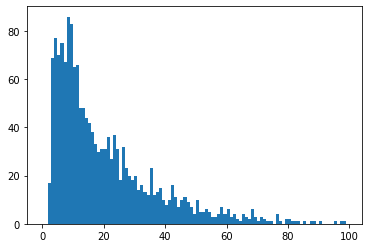

In [91]:
sent_lengths_1 = hadooplike_job(mapper4sent_lengths, summer, None, nd)

%time sent_lengths_result_1 = sent_lengths_1(clustered_alice) 
df = pd.DataFrame(chain(*sent_lengths_result_1), columns=["word", "occurences"])
plt.hist(df['word'], weights=df['occurences'], bins=range(100))
plt.show()

input is a list of length 1
input[0] is a list of length 4
input[0][0] = (0, '[Alice\'s Adventures in Wonderland by Lewis Carroll 1865]\n\nCHAPTER I. Down the Rabbit-Hole\n\
mapped is a list of length 1
mapped[0] is a list of length 1624
mapped[0][0] = (82, 1)
merged is a list of length 1
merged[0] is a list of length 93
merged[0][0] = (82, [1])
combined is a list of length 1
combined[0] is a list of length 93
combined[0][0] = (82, 1)
shuffled is a list of length 4
shuffled[0] is a list of length 23
shuffled[0][0] = (32, [16])
reduced is a list of length 4
reduced[0] is a list of length 23
reduced[0][0] = (32, 16)
CPU times: user 311 ms, sys: 1.96 ms, total: 312 ms
Wall time: 316 ms


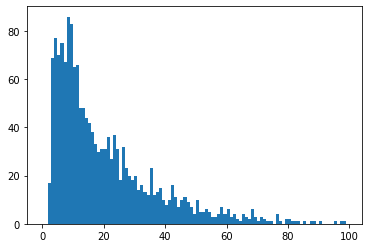

In [92]:
sent_lengths_2 = hadooplike_job(mapper4sent_lengths, summer, summer, nd)

%time sent_lengths_result_2 = sent_lengths_2(clustered_alice) 
df = pd.DataFrame(chain(*sent_lengths_result_2), columns=["word", "occurences"])
plt.hist(df['word'], weights=df['occurences'], bins=range(100))
plt.show()